In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
train_sample_1 = pd.read_csv('train_sample.csv')
train_sample_2 = pd.read_csv('train_sample_2.csv')

In [4]:
print(train_sample_1)

      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         0       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         0       0       0       0       0       0       0       0       0   
3         0       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
4995      9       0       0       0       0       0       0       0       0   
4996      9       0       0       0       0       0       0       0       0   
4997      9       0       0       0       0       0       0       0       0   
4998      9       0       0       0       0       0       0       0       0   
4999      9       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pi

## För att se vilket av dataset som har bäst kvalite tänker jag kolla antal rader, kolumner och den beskrivande statistiken på både dataset.

In [5]:
print('Antal rader:', len(train_sample_1))

Antal rader: 5000


In [7]:
print('Kolumnnamn:', train_sample_1.columns)

Kolumnnamn: Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [89]:
print("Beskrivande statistik:\n", train_sample_1.describe())


Beskrivande statistik:
              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  5000.000000  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872569     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel774     pixel775  pixel776     pixel777  \
count  5000.0  5000.0  ...  5000.000000  5000.000000    5000.0  5000.000000   
mean      0.0     0.0  ...     0.176800     0.039000       0.0     0.015800   
std       0.0     0.0  ...     5.362

In [10]:
print('Antal rader i dataset 2:', len(train_sample_2))

Antal rader i dataset 2: 5000


In [11]:
print('Kolumnnamn i dataset 2:', train_sample_2.columns)

Kolumnnamn i dataset 2: Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775', 'pixel776',
       'pixel777', 'pixel778', 'pixel779', 'pixel780'],
      dtype='object', length=782)


In [12]:
print("Beskrivande statistik:\n", train_sample_2.describe())

Beskrivande statistik:
              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  5000.000000  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872569     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel771     pixel772     pixel773  \
count  5000.0  5000.0  ...  5000.000000  5000.000000  5000.000000   
mean      0.0     0.0  ...     0.487200     0.516600     0.303400   
std       0.0     0.0  ...     8.876395     9.785626     6.871826 

### Det verkar som att både dataseten har samma antal rader och liknande kolumnnamn. Den enda skillnaden verkar vara att train_sample_1 har tre extra kolumn jämfört med train_sample_2.

### När man tittar på den beskrivande statistiken verkar de flesta pixelvärdena vara 0 i båda dataseten, vilket är förväntat eftersom MNIST-datasetet innehåller handskrivna siffror. Medianvärdena för de flesta kolumnerna är också 0. Vissa kolumner har dock värden upp till 255 i båda dataseten.

### Uttifrån informationen ovan kan det vara svårt att säga vilket dataset som har bäst kvalitet, eftersom det verkar finnas liknande egenskaper i båda dataseten. Så jag tänkte utföra ytterligare analys för att bedöma kvaliteten, som att utföra visualiseringar.

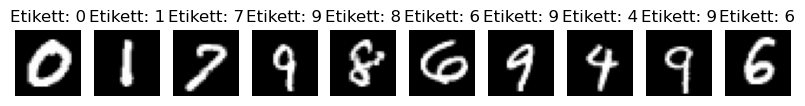

In [72]:
random_indexes = np.random.choice(len(train_sample_1), size=10, replace=False)
random_images = train_sample_1.loc[random_indexes, 'pixel0':'pixel783'].values.reshape(-1, 28, 28)
random_labels = train_sample_1.loc[random_indexes, 'label'].values
# Plotta bilderna
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')
    ax.set_title(f'Etikett: {random_labels[i]}')
    ax.axis('off')
plt.show()


### Eftersom train_sample_2 har tre kolumner mindre så det går inte att reshape med(28x28) därför försöker jag omforma den genom att lägga till tre kolumner med värden 0

In [55]:
train_sample_2['pixel781'] = 0
train_sample_2['pixel782'] = 0
train_sample_2['pixel783'] = 0

In [61]:
print("Beskrivande statistik:\n", train_sample_2.describe())

Beskrivande statistik:
              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  5000.000000  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872569     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel774     pixel775  pixel776     pixel777  \
count  5000.0  5000.0  ...  5000.000000  5000.000000    5000.0  5000.000000   
mean      0.0     0.0  ...     0.176800     0.039000       0.0     0.015800   
std       0.0     0.0  ...     5.362

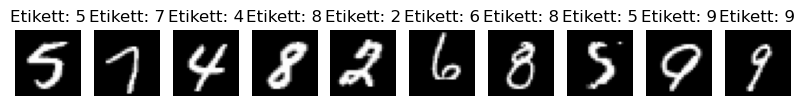

In [83]:
random_indexes = np.random.choice(len(train_sample_2), size=10, replace=False)
random_images = train_sample_2.loc[random_indexes, 'pixel0':'pixel783'].values.reshape(-1, 28, 28)
random_labels = train_sample_2.loc[random_indexes, 'label'].values

fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')
    ax.set_title(f'Etikett: {random_labels[i]}')
    ax.axis('off')
plt.show()

## Som det syns i resultaten, både dataseten är i samma kvalitet så jag vill kolla på fördelning av klasserna 

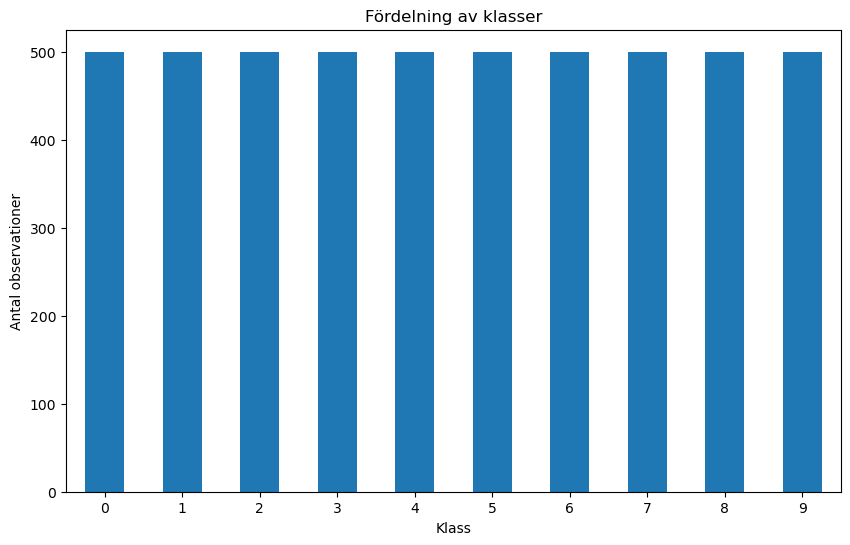

In [68]:
class_counts = train_sample_2['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Klass')
plt.ylabel('Antal observationer')
plt.title('Fördelning av klasser')
plt.xticks(rotation=0)
plt.show()

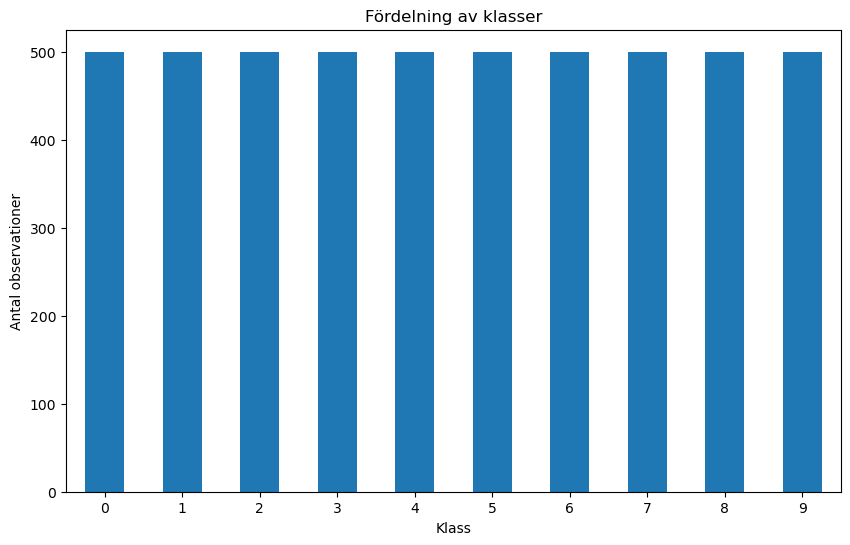

In [69]:
class_counts = train_sample_1['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Klass')
plt.ylabel('Antal observationer')
plt.title('Fördelning av klasser')
plt.xticks(rotation=0)
plt.show()

## Klassfördelning i både dataset har samma observationer. inga skilnad.
## Jag vill gå vidare med train_sample_1 eftersom det har tre kolumner mer är train_sample_2.

In [71]:
num_classes = train_sample_2['label'].nunique()
print("Antal klasser i datasetet:", num_classes)

Antal klasser i datasetet: 10


## Ritar ut minst en variant av varje siffra som en bild på siffran.

In [106]:
# Hitta unika klasser i datasetet
unique_classes = train_sample_1['label'].unique()

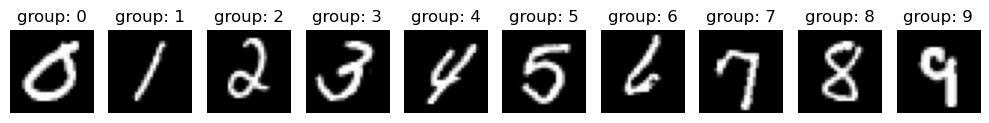

In [108]:
# Skapa en subplot med en rad och antalet unika klasser som kolumner
fig, axes = plt.subplots(1, len(unique_classes), figsize=(10, 2))

# Loopa över varje unik klass
for i, class_label in enumerate(unique_classes):
    # Hitta en slumpmässig bild med den aktuella klassen
    random_image = train_sample_1[train_sample_1['label'] == class_label].sample(1).values[:, 1:].reshape(28, 28)
    
    # Plotta bilden i motsvarande subplot
    axes[i].imshow(random_image, cmap='gray')
    axes[i].set_title(f'group: {class_label}')
    axes[i].axis('off')

# Justera layouten för att undvika överlappning
plt.tight_layout()

# Visa plotten
plt.show()

# Träna KNN

In [121]:
train_labels = train_sample_1['label']
train_images = train_sample_1.drop('label', axis=1)

# Läs in testdata
test_data = pd.read_csv('test_sample.csv')
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1)


In [137]:
# Skapa och träna KNN-modellen
knn = KNeighborsClassifier(10)  # antal grannar (k) är 10
knn.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [138]:
# Klassificera testbilder
predictions = knn.predict(test_images)

In [141]:
accuracy = accuracy_score(test_labels, predictions)
print("Nogrannheten med 10 grannar :", accuracy)

Nogrannheten med 10 grannar : 0.928


In [142]:
knn = KNeighborsClassifier(100)  # antal grannar (k) är 100
knn.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=100)

In [143]:
predictions = knn.predict(test_images)

In [144]:
accuracy = accuracy_score(test_labels, predictions)
print("Nogrannheten med 100 grannar :", accuracy)

Nogrannheten med 100 grannar : 0.868


In [151]:
# Skapa en förvirringsmatris
confusion_matrix = confusion_matrix(test_labels, predictions)
print('Condusion matrix:')
print(confusion_matrix)

Condusion matrix:
[[ 94   0   0   0   0   0   6   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0  17  75   1   1   0   1   3   1   1]
 [  1   8   1  80   0   2   1   1   2   4]
 [  0   3   0   0  81   0   0   0   0  16]
 [  1  13   0   3   0  78   3   1   0   1]
 [  0   1   0   0   0   2  96   0   1   0]
 [  0   6   0   0   0   0   0  88   0   6]
 [  1   8   0   3   1   5   0   0  80   2]
 [  0   1   0   0   0   0   0   3   0  96]]


## Ska skapa egen så att de k närmsta grannarna ritas ut för en prediktion.

In [161]:
def plot_k_nearest_neighbors(model, train_images, train_labels, test_images, image_index, k=10):
    # Hämta de k närmaste grannarna för den angivna bilden
    distances, indices = model.kneighbors([test_images[image_index]], n_neighbors=k)

    # Hämta bilderna och etiketterna för de k närmaste grannarna
    neighbors_images = train_images[indices[0]].reshape(-1, 28, 28)
    neighbors_labels = train_labels[indices[0]]

    # Rita ut bilderna och deras etiketter i en subplot
    fig, axes = plt.subplots(1, k+1, figsize=(10, 2))
    
    # Rita ut den angivna bilden
    axes[0].imshow(test_images[image_index].reshape(28, 28), cmap='gray')
    axes[0].set_title('prediktion bild')
    axes[0].axis('off')
    
    # Rita ut de k närmaste grannarna
    for i in range(k):
        axes[i+1].imshow(neighbors_images[i], cmap='gray')
        axes[i+1].set_title(f'Granne {i+1}\nEtikett: {neighbors_labels[i]}')
        axes[i+1].axis('off')
    
    plt.tight_layout()
    plt.show()

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


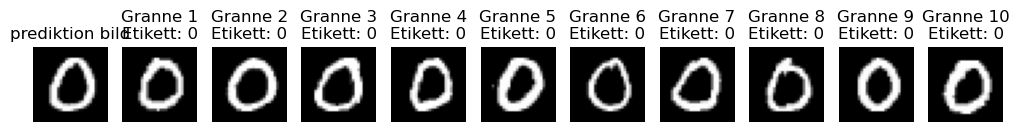

In [162]:
plot_k_nearest_neighbors(knn, train_images.values, train_labels.values, test_images.values, 0, k=10)


## Skriva en egen KNN

In [188]:
train_sample_1.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [189]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train).astype(float)  # Typkonvertera till float
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        X_test = np.array(X_test).astype(float)  # Typkonvertera till float
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return predictions
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

In [190]:
# Skapa och träna en KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(train_images, train_labels)

# Använd egenimplementerad KNN för att göra prediktioner
knn_custom = KNN(k=5)
knn_custom.fit(train_images, train_labels)
test_predictions_custom = knn_custom.predict(test_images)

# Använd scikit-learn KNeighborsClassifier för att göra prediktioner
test_predictions_sklearn = knn_sklearn.predict(test_images)

# Jämför prediktionerna
differences = test_predictions_custom - test_predictions_sklearn
mismatch_indices = np.nonzero(differences)[0]
print("Antal olika prediktioner:", len(mismatch_indices))
print("Indicer för olika prediktioner:", mismatch_indices)

Antal olika prediktioner: 0
Indicer för olika prediktioner: []


In [192]:
knn = KNN(k=5)
knn.fit(train_images, train_labels)
test_score = knn.score(train_images, train_labels)
print('Test score:', test_score)

Test score: None
